# Exploratory Data Analysis - Gabrielle Nyirjesy
## Data Import and Initial Analysis

In [22]:
# Read in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

In [2]:
#Read in the data
df = pd.read_csv("../../data/float_loc_data_new_vars.csv")
df.head()

,float,latitude,longitude,cycleNumber,date,PRES,PSAL,TEMP,BBP700,CHLA,...,sat_pic,sat_Rrs_678,sat_aph_443,sat_par,sat_angstrom,sat_bb_678,sat_adg_443,sat_aot_869,sat_adg_s,sat_bbp_s
0,1902303,49.236,-14.742,1,2021-05-06 02:03:16,3,35.539001,12.378333,0.001788,0.695875,...,0.000306,0.000354,0.0357,27.891998,1.1175,0.001995,0.0083,0.0951,0.018,1.600373
1,1902303,49.236,-14.742,1,2021-05-06 02:03:16,4,35.539001,12.378333,0.001788,0.695875,...,0.000306,0.000354,0.0357,27.891998,1.1175,0.001995,0.0083,0.0951,0.018,1.600373
2,1902303,49.236,-14.742,1,2021-05-06 02:03:16,6,35.539001,12.378667,0.001788,0.696499,...,0.000306,0.000354,0.0357,27.891998,1.1175,0.001995,0.0083,0.0951,0.018,1.600373
3,1902303,49.236,-14.742,1,2021-05-06 02:03:16,8,35.539001,12.379000,0.001789,0.716489,...,0.000306,0.000354,0.0357,27.891998,1.1175,0.001995,0.0083,0.0951,0.018,1.600373
4,1902303,49.236,-14.742,1,2021-05-06 02:03:16,10,35.539001,12.379000,0.001790,0.715552,...,0.000306,0.000354,0.0357,27.891998,1.1175,0.001995,0.0083,0.0951,0.018,1.600373


In [3]:
#Examine all of the columns
df.columns

Index(['float', 'latitude', 'longitude', 'cycleNumber', 'date', 'PRES', 'PSAL',
       'TEMP', 'BBP700', 'CHLA', 'short_date', 'sat_chl', 'sat_ipar',
       'sat_sst', 'sat_poc', 'sat_bbp_443', 'sat_a_678', 'sat_kd_490',
       'sat_nflh', 'sat_pic', 'sat_Rrs_678', 'sat_aph_443', 'sat_par',
       'sat_angstrom', 'sat_bb_678', 'sat_adg_443', 'sat_aot_869', 'sat_adg_s',
       'sat_bbp_s'],
      dtype='object')

In [169]:
#convert date column to datetime object
df['date'] = pd.to_datetime(df['date'])
print('minimum date: ',df['date'].min())
print('maximum date: ',df['date'].max())

#Find the number of floats
print(df['float'].nunique(), ' unique floats')
#How many observations for each float?
print('Mean # observations per float: ',df['float'].value_counts().mean())

minimum date:  2010-06-23 21:03:21
maximum date:  2022-05-23 11:34:00
565  unique floats
Mean # observations per float:  58779.853097345134


In [67]:
#Add year and month column to look at seasonality
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [117]:
#How many floats have measurements each year?
year_count = df[['year','month','float']].groupby(['year','month']).nunique()
year_count = year_count.reset_index()
# year_count['percent'] = year_count['float']/year_count.groupby('year')['float'].transform('sum')*100
year_count.tail()

,year,month,float
139,2022,1,180
140,2022,2,179
141,2022,3,187
142,2022,4,189
143,2022,5,171


In [120]:
#How many observations are there for each year?
year_count_obs = df[['year','month']].reset_index().groupby(['year','month']).nunique()
year_count_obs = year_count_obs.reset_index()
# year_count['percent'] = year_count['float']/year_count.groupby('year')['float'].transform('sum')*100
year_count_obs.tail()

,year,month,index
139,2022,1,320502
140,2022,2,315745
141,2022,3,361237
142,2022,4,343726
143,2022,5,186705


In [165]:
crosstab = pd.crosstab(index=year_count_obs['year'],
                        columns=year_count_obs['month'],
                        values = year_count_obs['index'],
                        aggfunc=np.sum)#,
                        # normalize='index')
crosstab

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,1121.0,2803.0,3428.0,2804.0,1956.0,4184.0,2825.0
2011,2715.0,2975.0,2232.0,3200.0,6611.0,5836.0,8754.0,6031.0,7617.0,7153.0,5019.0,6038.0
2012,13862.0,10713.0,19140.0,15824.0,16037.0,12248.0,19185.0,22041.0,19251.0,29508.0,51269.0,51913.0
2013,47452.0,40307.0,58175.0,86710.0,159339.0,265019.0,137860.0,95526.0,106706.0,112285.0,102520.0,117162.0
2014,127720.0,129810.0,193690.0,174330.0,209334.0,192499.0,203158.0,147672.0,127575.0,145572.0,179585.0,194444.0
2015,232115.0,257965.0,270498.0,271019.0,428528.0,338603.0,308052.0,244155.0,226215.0,284359.0,368160.0,407782.0
2016,361406.0,301560.0,455680.0,471263.0,355796.0,291378.0,270461.0,250727.0,263085.0,321189.0,351538.0,397987.0
2017,399407.0,358270.0,311732.0,309862.0,300768.0,281789.0,287830.0,345496.0,347673.0,380524.0,333138.0,379625.0
2018,386595.0,374520.0,354379.0,311997.0,281247.0,299904.0,280081.0,301964.0,326884.0,417635.0,376486.0,397123.0


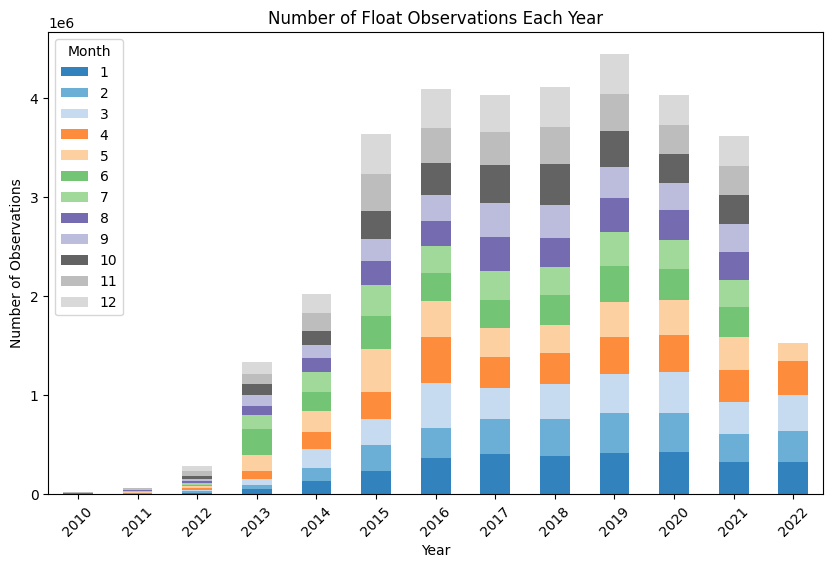

In [206]:
crosstab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20c', 
                    figsize=(10, 6))
_ = plt.title('Number of Float Observations Each Year')
_ = plt.xlabel('Year')
_ = plt.xticks(rotation=45)
_ = plt.ylabel ('Number of Observations')
_ = plt.legend(title='Month')
# plt.legend(loc='right',bbox_to_anchor=(1, 1),ncol=12)

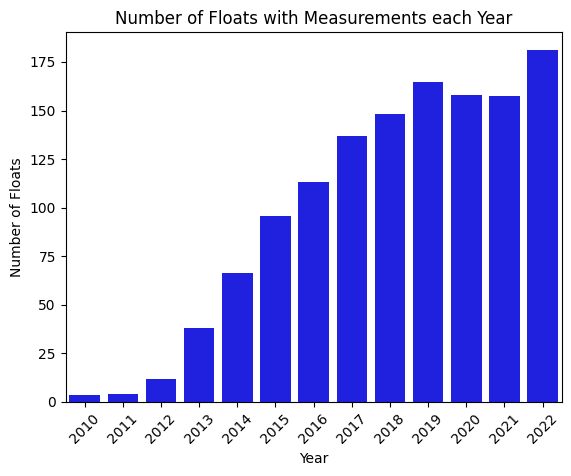

In [231]:
_ = sns.barplot(data=year_count, y='float',x='year', errorbar=None, color='blue')
_ = plt.xlabel('Year')
_ = plt.xticks(rotation=45)
_ = plt.ylabel('Number of Floats')
_ = plt.title('Number of Floats with Measurements each Year')
plt.show()

In [17]:
#Find bounds of space
print(df['latitude'].min())
print(df['latitude'].max())
print(df['longitude'].min())
print(df['longitude'].max())
#Covers the whole globe

-75.647
78.759
-179.985
179.991


In [207]:
test = pd.cut(df['latitude'], [10,20,30,40,50,60,70,80])

In [241]:
#Bin into symmetrical latitude bins from the equator
df['lat_bin'] = pd.cut(abs(df['latitude']), [-.1,10,20,30,40,50,60,70,80])
df['lat_bin'] = np.where(df['lat_bin'] == '(-0.1, 10.0]','[0.0,10.0]', df['lat_bin'])
df['lat_bin'].unique()

<IntervalArray>
[(40.0, 50.0], (10.0, 20.0], (20.0, 30.0], (-0.1, 10.0], (50.0, 60.0], (30.0, 40.0], (60.0, 70.0], (70.0, 80.0]]
Length: 8, dtype: interval[float64, right]

In [228]:
#Find mean values for chl/bbp/sst within each bin and month
plotting_by_bin = pd.DataFrame(df[['month','sat_chl','sat_bbp_443','sat_sst','lat_bin']].groupby(['month','lat_bin']).mean())
plotting_by_bin = plotting_by_bin.reset_index()
plotting_by_bin.head()

,month,lat_bin,sat_chl,sat_bbp_443,sat_sst
0,1,"(-0.1, 10.0]",0.162352,0.001966,27.841074
1,1,"(10.0, 20.0]",0.151823,0.001641,26.219424
2,1,"(20.0, 30.0]",0.088248,0.001560,24.769574
3,1,"(30.0, 40.0]",0.204166,0.001850,18.029633
4,1,"(40.0, 50.0]",0.298129,0.002976,10.673142


In [229]:
#Create normalized dataset to plot on single scale
plotting_by_bin_norm = plotting_by_bin.copy()
plotting_by_bin_norm = plotting_by_bin_norm.groupby(['lat_bin']).transform(lambda x: (x-x.min())/(x.max() - x.min()))
plotting_by_bin_norm['lat_bin'] = plotting_by_bin['lat_bin']
plotting_by_bin_norm['month'] = plotting_by_bin['month']
plotting_by_bin_norm.head()

,month,sat_chl,sat_bbp_443,sat_sst,lat_bin
0,1,0.870359,0.768705,0.000000,"(-0.1, 10.0]"
1,1,0.267012,0.000000,0.000000,"(10.0, 20.0]"
2,1,0.404136,0.000000,0.021037,"(20.0, 30.0]"
3,1,0.721296,1.000000,0.143131,"(30.0, 40.0]"
4,1,0.413027,0.867789,0.144845,"(40.0, 50.0]"


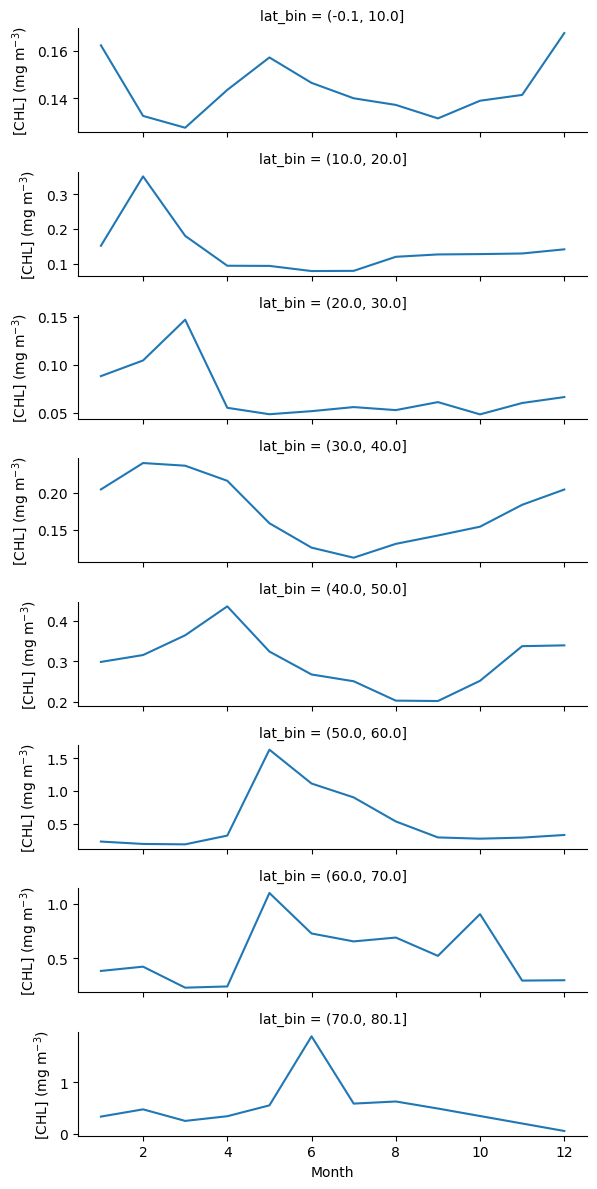

In [239]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    g = sns.FacetGrid(plotting_by_bin, row="lat_bin", 
                    height=1.5, aspect=4,sharey=False)
    g.map(sns.lineplot, "month","sat_chl")
    g.set_axis_labels("Month", "[CHL] (mg m$^{-3}$)")
    # g.map(sns.lineplot, "month","sat_sst",color='orange') #change df to normalized version if plotting both sst and sst

# Seasonality of different floats

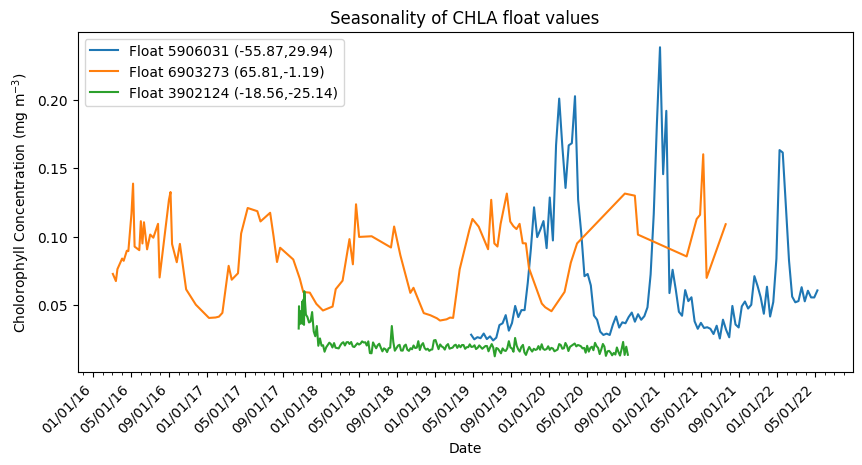

In [233]:
plt.figure(figsize=(10,5))
profile_subset = df[df['float'] == 5906031].sort_values(by='date')
float_num1 = str(profile_subset['float'].unique()[0])
lat_val1 = str(round(profile_subset['latitude'].iloc[1],2))
lon_val1 = str(round(profile_subset['longitude'].iloc[1],2))
_ = sns.lineplot(data=profile_subset,x='date',y='CHLA', errorbar=None)
profile_subset = df[df['float'] == 6903273].sort_values(by='date')
float_num2 = str(profile_subset['float'].unique()[0])
lat_val2 = str(round(profile_subset['latitude'].iloc[1],2))
lon_val2 = str(round(profile_subset['longitude'].iloc[1],2))
_ = sns.lineplot(data=profile_subset,x='date',y='CHLA', errorbar=None)
profile_subset = df[df['float']==3902124].sort_values(by='date')
float_num3 = str(profile_subset['float'].unique()[0])
lat_val3 = str(round(profile_subset['latitude'].iloc[1],2))
lon_val3 = str(round(profile_subset['longitude'].iloc[1],2))
_ = sns.lineplot(data=profile_subset,x='date',y='CHLA', errorbar=None)
ax = plt.gca()
# change tick frequency, format and rotation
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.gcf().autofmt_xdate()
_ = plt.xticks(rotation = 45)
_ = plt.title('Seasonality of CHLA float values')
_ = plt.ylabel('Cholorophyll Concentration (mg m$^{-3}$)')
_ = plt.xlabel('Date')
_ = plt.legend(['Float ' +float_num1+" ("+lat_val1+","+lon_val1+")",\
'Float ' +float_num2+" ("+lat_val2+","+lon_val2+")",\
'Float ' +float_num3+" ("+lat_val3+","+lon_val3+")"])
plt.show()


# Satellite Data Pull Analysis

In [251]:
#Open each variable data file
wd = '../../data/'
# wd = './data/'
chl_df = pd.read_csv(wd+'sat_chl_full_final.csv')
poc_df = pd.read_csv(wd+'sat_poc_full_final.csv')
pic_df = pd.read_csv(wd+'sat_pic_full_final.csv')
ipar_df = pd.read_csv(wd+'sat_ipar_full_final.csv')
a_678_df = pd.read_csv(wd+'sat_a_678_full_final.csv')
bbp_443_df = pd.read_csv(wd+'sat_bbp_443_full_final.csv')
kd_490_df = pd.read_csv(wd+'sat_kd_490_full_final.csv')
rrs_678_df = pd.read_csv(wd+'sat_Rrs_678_full_final.csv')
nflh_df = pd.read_csv(wd+'sat_nflh_full_final.csv')
sst_df = pd.read_csv(wd+'sat_sst_full_final.csv')
par_df = pd.read_csv(wd+'par_full_final.csv')
adg_443_df = pd.read_csv(wd+'adg_443_full_final.csv')
adg_s_df = pd.read_csv(wd+'adg_s_full_final.csv')
angstrom_df = pd.read_csv(wd+'angstrom_full_final.csv')
aot_869_df = pd.read_csv(wd+'aot_869_full_final.csv')
aph_443_df = pd.read_csv(wd+'aph_443_full_final.csv')
bb_678_df = pd.read_csv(wd+'bb_678_full_final.csv')
bbp_s_df = pd.read_csv(wd+'bbp_s_full_final.csv')
vars = ['chl','poc','pic','ipar','a_678','bbp_443','kd_490','Rrs_678','nflh','sst','adg_443','adg_s','angstrom','aot_869','aph_443','bb_678','bbp_s']
vars = sorted(vars,key=str.casefold)
#some variables have sat_var_period while others have var_period colnames:
sat_vars = ['chl','poc','pic','ipar','a_678','bbp_443','kd_490','Rrs_678','nflh','sst']

In [246]:
#Merge all variables into one dataframe
var_df = chl_df.merge(poc_df, how='left',on=['latitude','longitude','short_date'])\
    .merge(pic_df, how='left',on=['latitude','longitude','short_date'])\
        .merge(ipar_df, how='left',on=['latitude','longitude','short_date'])\
            .merge(a_678_df, how='left',on=['latitude','longitude','short_date'])\
                .merge(bbp_443_df, how='left',on=['latitude','longitude','short_date'])\
                    .merge(kd_490_df, how='left',on=['latitude','longitude','short_date'])\
                        .merge(rrs_678_df, how='left',on=['latitude','longitude','short_date'])\
                            .merge(nflh_df, how='left',on=['latitude','longitude','short_date'])\
                                .merge(sst_df, how='left',on=['latitude','longitude','short_date'])\
                                    .merge(par_df, how='left',on=['latitude','longitude','short_date'])\
                                        .merge(adg_443_df, how='left',on=['latitude','longitude','short_date'])\
                                            .merge(adg_s_df, how='left',on=['latitude','longitude','short_date'])\
                                                .merge(angstrom_df, how='left',on=['latitude','longitude','short_date'])\
                                                    .merge(aot_869_df, how='left',on=['latitude','longitude','short_date'])\
                                                        .merge(aph_443_df, how='left',on=['latitude','longitude','short_date'])\
                                                            .merge(bb_678_df, how='left',on=['latitude','longitude','short_date'])\
                                                                .merge(bbp_s_df, how='left',on=['latitude','longitude','short_date'])\
                                        
var_df.head()

,latitude,longitude,sat_chl_day,sat_chl_8d,sat_chl_month,short_date,sat_poc_day,sat_poc_8d,sat_poc_month,sat_pic_day,...,aot_869_month,aph_443_day,aph_443_8d,aph_443_month,bb_678_day,bb_678_8d,bb_678_month,bbp_s_day,bbp_s_8d,bbp_s_month
0,49.236,-14.742,NaN,0.370203,0.634175,2021-05-06,NaN,94.600098,123.600098,NaN,...,0.1279,NaN,0.0357,0.0419,NaN,0.001995,0.00201,NaN,1.600373,1.409981
1,49.096,-14.617,NaN,NaN,0.553922,2021-05-06,NaN,NaN,109.399902,NaN,...,0.0753,NaN,NaN,0.0405,NaN,NaN,0.00198,NaN,NaN,1.504962
2,48.988,-14.777,NaN,0.463418,0.657617,2021-05-06,NaN,103.199707,133.399902,NaN,...,0.1918,NaN,0.0390,0.0286,NaN,0.002020,0.00188,NaN,1.541033,1.347602
3,48.870,-14.849,NaN,0.739815,0.496088,2021-05-06,NaN,130.199707,109.399902,NaN,...,0.1662,NaN,0.0514,0.0311,NaN,0.002205,0.00174,NaN,1.357182,1.492329
4,0.462,94.080,NaN,NaN,0.074981,2021-05-06,NaN,NaN,35.399902,NaN,...,0.0943,NaN,NaN,0.0076,NaN,NaN,0.00111,NaN,NaN,1.971506


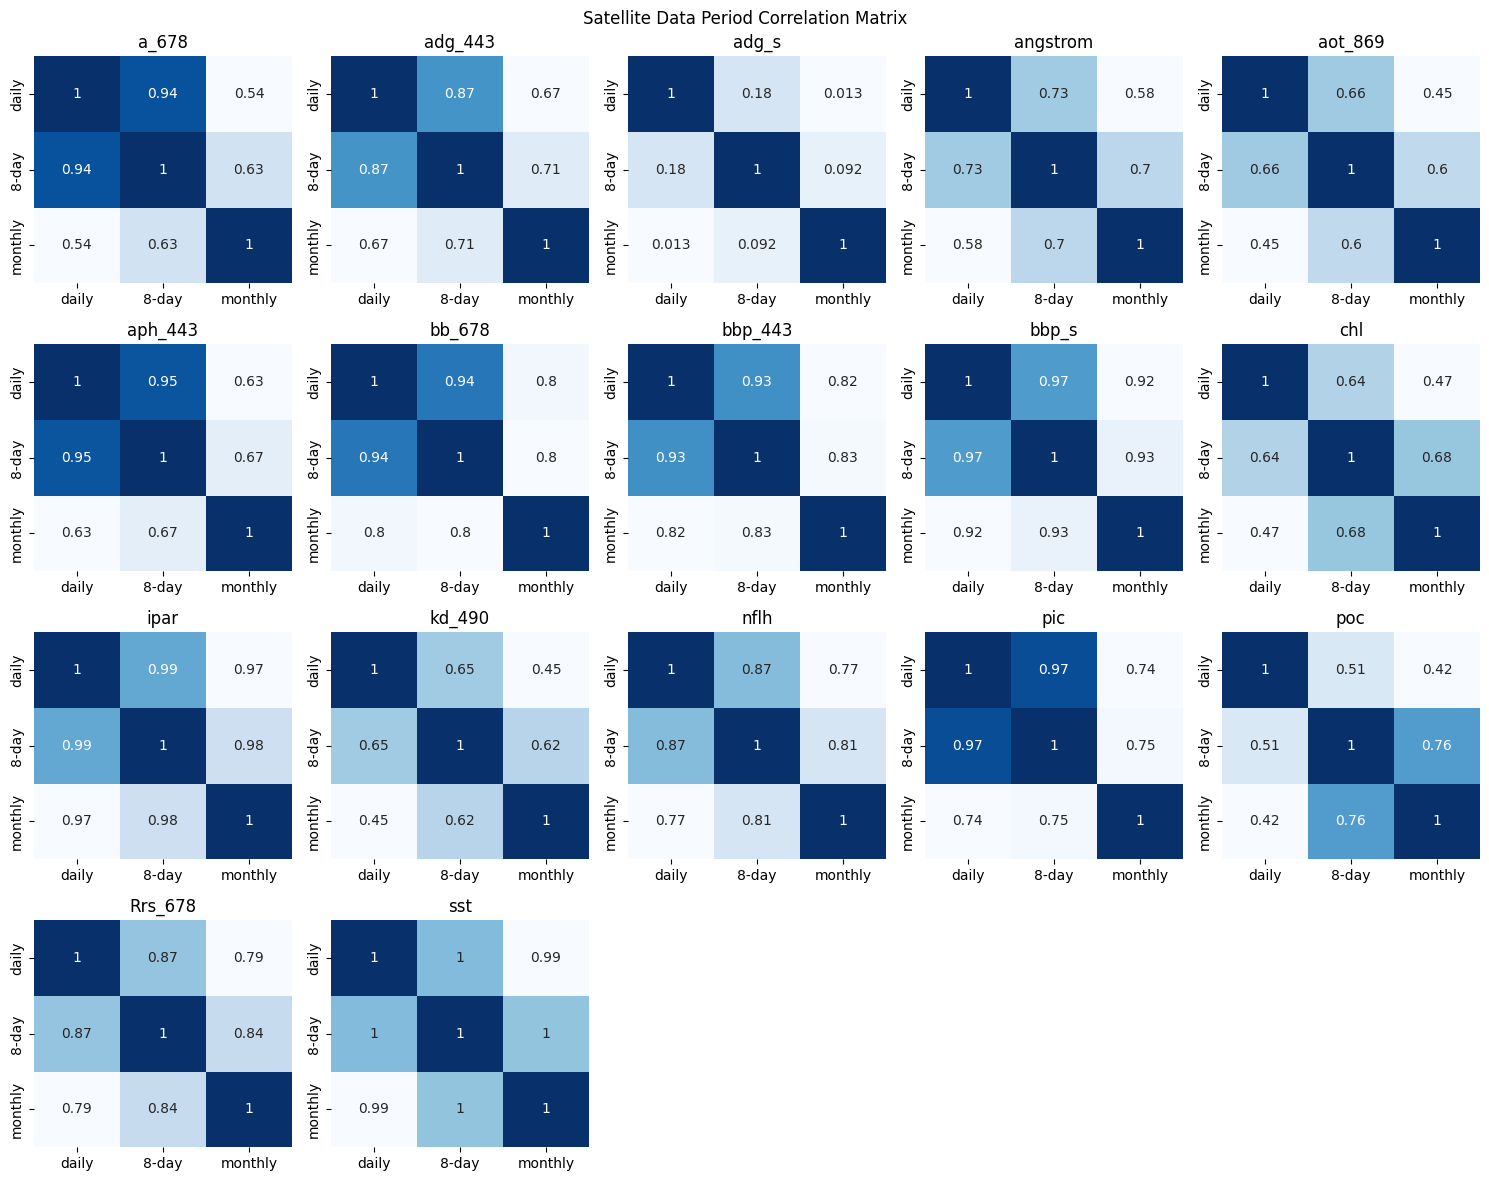

In [271]:
#Find correlation of daily vs. 8-day vs. monthly values for each variable
fig = plt.figure(figsize=(15, 12))
_ = fig.suptitle('Satellite Data Period Correlation Matrix')
for n, var in enumerate(vars):
    smaller_df = var_df[[col for col in var_df.columns if var in col]]
    # day_col = [col for col in smaller_df.columns if 'day' in col]
    # d8_col = [col for col in smaller_df.columns if '8d' in col]
    # month_col = [col for col in smaller_df.columns if 'month' in col]
    smaller_df = smaller_df.rename(columns=lambda x: 'daily' if x.endswith('day') else '8-day' if x.endswith('8d') \
        else 'monthly' if x.endswith('month') else x)
    plt.subplot(4,5, n + 1)
    CorrMatrix = smaller_df.corr()
    _ = plt.title(var)
    sns.heatmap(CorrMatrix, annot=True,cmap="Blues",cbar=False)
    plt.tight_layout()
plt.show()

In [194]:
#Summarize differences between daily values and 8-day/monthly values
for n, var in enumerate(vars):
    if '_' in var:
        var_df_name = var.replace('_','')
    else:
        var_df_name = var
    if var in sat_vars:
        var_df[var_df_name+'_diff_8d_value'] = var_df['sat_'+var+"_day"] - var_df['sat_'+var+'_8d']
        var_df[var_df_name+'_diff_8d_pct'] = (var_df['sat_'+var+"_day"] - var_df['sat_'+var+'_8d'])/var_df['sat_'+var+"_day"]*100
        
        var_df[var_df_name+'_diff_month_value'] = var_df['sat_'+var+"_day"] - var_df['sat_'+var+'_month']
        var_df[var_df_name+'_diff_month_pct'] = (var_df['sat_'+var+"_day"] - var_df['sat_'+var+'_month'])/var_df['sat_'+var+"_day"]*100
    else:
        var_df[var_df_name+'_diff_8d_value'] = var_df[var+"_day"] - var_df[var+'_8d']
        var_df[var_df_name+'_diff_8d_pct'] = (var_df[var+"_day"] - var_df[var+'_8d'])/var_df[var+"_day"]*100
        
        var_df[var_df_name+'_diff_month_value'] = var_df[var+"_day"] - var_df[var+'_month']
        var_df[var_df_name+'_diff_month_pct'] = (var_df[var+"_day"] - var_df[var+'_month'])/var_df[var+"_day"]*100
#Create data frame of only residual/difference columns - for summary stats
diff_cols = [col for col in var_df.columns if 'diff' in col]
diff_df = var_df[diff_cols]

In [195]:
#Find mean, min, and max differences for each variable, find in terms of real value and percent
diff_stats = diff_df.describe().loc[['mean','min','max']]
diff_stats = diff_stats.T
diff_stats = diff_stats.reset_index()
diff_stats[['var','diff','period','type']] = diff_stats['index'].str.split('_', expand=True)
diff_stats = diff_stats[['var','period','type','mean','min','max']]
diff_stats

,var,period,type,mean,min,max
0,chl,8d,value,0.005240,-5.378696,54.371272
1,chl,8d,pct,-4.752820,-818.013397,98.457692
2,chl,month,value,-0.002543,-19.661738,51.015942
3,chl,month,pct,-11.974794,-3036.380540,93.365937
4,poc,8d,value,0.896149,-1585.600098,11918.000488
...,...,...,...,...,...,...
63,bb678,month,pct,-3.425880,-842.757019,84.158665
64,bbps,8d,value,0.001976,-0.806357,0.759685
65,bbps,8d,pct,-0.147597,-718.273236,46.120287
66,bbps,month,value,0.004063,-1.138360,0.678831


In [196]:
#Convert difference df into final format for report
diff_stats_pivot = diff_stats.pivot(index = ['var','period'], columns='type',values=['mean','min','max']).reset_index()
diff_stats_pivot.columns = list(map("_".join, diff_stats_pivot.columns))
pct_cols = [col for col in diff_stats_pivot.columns if "pct" in col]
val_cols = [col for col in diff_stats_pivot.columns if "value" in col]
for col in pct_cols:
    diff_stats_pivot[col] = diff_stats_pivot[col].round(2)
for col in val_cols:    
    diff_stats_pivot[col] = diff_stats_pivot[col].apply(lambda x: format(x,".4g"))
diff_stats_pivot['mean'] = diff_stats_pivot.apply(lambda x: str(x['mean_value']) + " (" + str(x['mean_pct'])+"%)", axis=1)
diff_stats_pivot['min'] = diff_stats_pivot.apply(lambda x: str(x['min_value']) + " (" + str(x['min_pct'])+"%)", axis=1)
diff_stats_pivot['max'] = diff_stats_pivot.apply(lambda x: str(x['max_value']) + " (" + str(x['max_pct'])+"%)", axis=1)
diff_stats_pivot = diff_stats_pivot[['var_','period_','mean','min','max']]
diff_stats_pivot['period_'] = np.where(diff_stats_pivot['period_'] == '8d','daily vs. 8-day', \
    np.where(diff_stats_pivot['period_'] == 'month','daily vs. monthly',diff_stats_pivot['period_']))
diff_stats_pivot = diff_stats_pivot.rename({'var_':'Variable','period_':'Period Comparison','mean':'Mean Difference','min':'Min Difference',\
    'max':'Max Difference'}, axis=1)
diff_stats_pivot['Variable'] = diff_stats_pivot['Variable'].apply(lambda x: x.lower())
diff_stats_pivot = diff_stats_pivot.sort_values(by=['Variable','Period Comparison'])
diff_stats_pivot.to_csv(wd+"period_stats.csv")
diff_stats_pivot

,Variable,Period Comparison,Mean Difference,Min Difference,Max Difference
2,a678,daily vs. 8-day,-5.482e-05 (-0.02%),-0.5131 (-100.88%),0.2864 (35.3%)
3,a678,daily vs. monthly,-0.0001905 (-0.08%),-0.5152 (-105.3%),0.978 (53.6%)
4,adg443,daily vs. 8-day,-0.0001907 (-9.87%),-0.3528 (-7669.48%),0.2061 (85.07%)
5,adg443,daily vs. monthly,-0.0003113 (-22.19%),-0.3391 (-17847.77%),0.4138 (87.66%)
6,adgs,daily vs. 8-day,-3.585e-12 (-0.0%),-7.451e-09 (-0.0%),9.313e-09 (0.0%)
7,adgs,daily vs. monthly,-7.905e-11 (-0.0%),-9.313e-09 (-0.0%),9.313e-09 (0.0%)
8,angstrom,daily vs. 8-day,0.0102 (-5.11%),-1.598 (-44643.1%),1.755 (175940.7%)
9,angstrom,daily vs. monthly,0.01182 (-19.21%),-1.709 (-117580.45%),1.7 (252258.39%)
10,aot869,daily vs. 8-day,0.002891 (-21.08%),-0.1904 (-1031.87%),0.306 (93.91%)
11,aot869,daily vs. monthly,0.003979 (-31.6%),-0.17 (-1080.73%),0.2716 (90.07%)


In [198]:
#Find %missing for each variable daily/8-day/monthly
missing_val = pd.DataFrame(columns=['Variable','Daily','8-Day','Monthly'])
for var in vars:
    if var in sat_vars:
        day_filled = var_df[var_df['sat_'+var+'_day'].notnull()]
        d8_filled = var_df[var_df['sat_'+var+'_8d'].notnull()]
        month_filled = var_df[var_df['sat_'+var+'_month'].notnull()]
    else:
        day_filled = var_df[var_df[var+'_day'].notnull()]
        d8_filled = var_df[var_df[var+'_8d'].notnull()]
        month_filled = var_df[var_df[var+'_month'].notnull()]
    day_val = round(len(day_filled)/len(var_df)*100,2)
    d8_val = round(len(d8_filled)/len(var_df)*100,2)
    month_val = round(len(month_filled)/len(var_df)*100,2)
    missing_val.loc[len(missing_val)] = [var, day_val, d8_val, month_val]
missing_val

,Variable,Daily,8-Day,Monthly
0,chl,17.96,58.74,83.08
1,poc,17.95,62.07,83.08
2,pic,16.29,59.94,82.02
3,ipar,13.14,54.06,79.77
4,a_678,17.67,61.90,82.90
5,bbp_443,17.67,61.90,82.90
6,kd_490,17.96,62.08,83.08
7,Rrs_678,17.96,62.08,83.08
8,nflh,13.14,54.06,79.77
9,sst,32.30,80.37,94.66


In [202]:
#Mean % missing for each period
missing_val.describe().loc['mean']

Daily      18.018235
8-Day      61.815294
Monthly    83.235294
Name: mean, dtype: float64